In [2]:
import os
import re
from glob import glob

import pydicom
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image


In [9]:
train = sorted(glob("../../input/rsna-breast-cancer-detection/train_images/*/*.dcm"))
test = sorted(glob("../../input/rsna-breast-cancer-detection/test_images/*/*.dcm"))

In [8]:
df_train = pd.read_csv("../../input/rsna-breast-cancer-detection/train.csv")
df_train.head(5)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


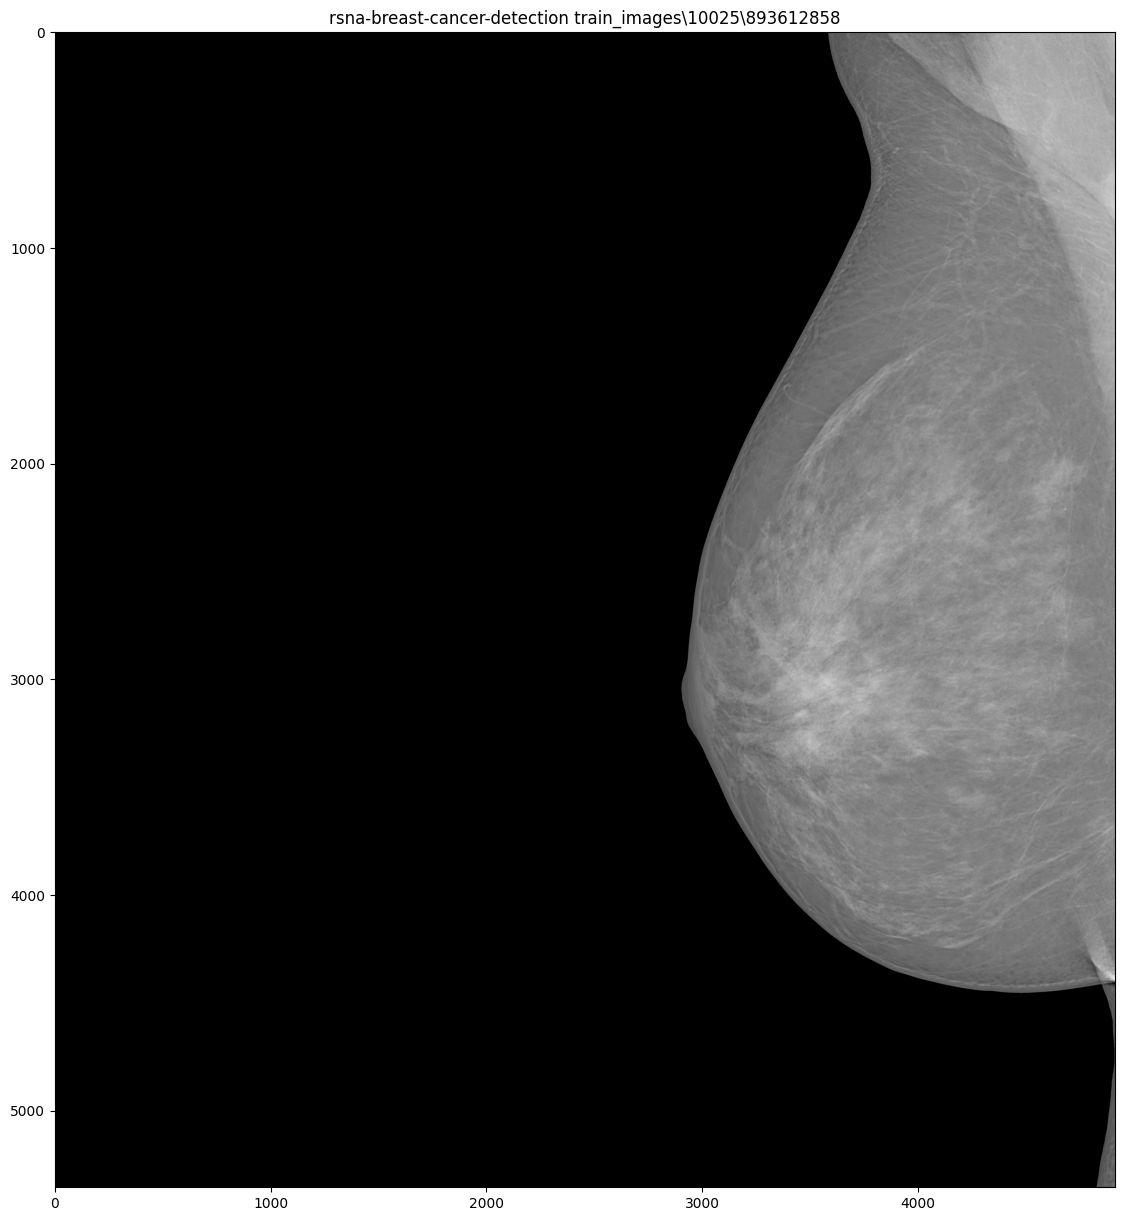

In [17]:
f = train[11]
patient = f.split('/')[-2]
image = f.split('/')[-1][:-4]
dicom = pydicom.dcmread(f)
img = dicom.pixel_array

img = (img - img.min()) / (img.max() - img.min())

if dicom.PhotometricInterpretation == "MONOCHROME1":
    img = 1 - img
    
plt.figure(figsize=(15, 15))
plt.imshow(img, cmap="gray")
plt.title(f"{patient} {image}")
plt.show()

In [20]:
img.shape

(5355, 4915)